# Vogais

Os sons silábicos da fala produzidos sem nenhuma constrição no trato vocal são as vogais. No português brasileiro temos 7 vogais i, ê, é, a, ó, ô, u (sendo a transcrição fonética [i,e,ɛ,a,ɔ,o,u]). Dizemos que as vogais distintas em uma língua possuem qualidades diferentes, ou seja, o que difere duas vogais pronunciadas na mesma altura (*pitch*), intensidade e duração é a qualidade da vogal. Sabemos que um dos fatores importantes para determinar a qualidade das vogais são seus formantes (frequências de ressonância do trato vocal). A figura abaixo ilustra o espectrograma de três vogais, onde podemos visualizar os formantes como as áreas de maior energia (tons de cinza escuro ou preto na figura).

![spectrogram iua](imgs/spectrogram_iua.png)
https://en.wikipedia.org/wiki/Formant

Para sintetizar vogais de diferentes qualidades, devemos conhecer a estrutura de formantes de cada uma das vogais de uma língua. Um dos pioneiros foi o sintetizado Klatt, cujos princípios são descritos em seu artigo de 1980. Para sintetizarmo algumas vogais, reproduziremos abaixo a Tabela II deste trabalho, contendo as frequências dos formantes e largura de banda.

Dennis H. Klatt, *Software for a cascade/parallel formant synthesizer*, The Journal of the Acoustical Society of America 67, 971 (1980)
https://doi.org/10.1121/1.383940


![table 2 klatt](imgs/klatt_table2.png)

Iremos utilizar os dados da Tabela II para sintetizar vogais, conforme veremos abaixo.

A frequência de ressonância (F, formante) nos fornece o ângulo do pólo e a largura de banda (BW) o raio do pólo:

$BW = - \frac{\ln R}{\pi T}$

$R = e^{-\pi BW T}$

In [2]:
pkg load signal

% Let's make the vowesl [i], [a] and [u] 
% Ref: Dennis H. Klatt, "Software for a cascade/parallel formant synthesizer," JASA, vol. 67, pp. 13-33, 1980.

vowels = {'[i]','[a]','[u]'};

% Formant frequencies in Hz
F = [   310, 2020, 2960;        % [i]
        700, 1220, 2600;        % [a]
        350, 1250, 2200];       % [u] 
% Formant bandwidth in Hz
BW = [   45, 200, 400;          % [i]
        130,  70, 160;          % [a]
         65, 110, 140];         % [u]

fs = 8192;  % Sampling rate in Hz ("telephone quality" for speed)
f0 = 200; % Pitch in Hz
w0T = 2*pi*f0/fs;
T = 2; % seconds (duration)
nsamps = fs*T;
nharm = floor((fs/2)/f0); % number of harmonics
sig = zeros(nsamps,1);
n = [0:(nsamps-1)]';
% Synthesize bandlimited impulse train
for i=1:nharm,
    sig = sig + cos(i*w0T*n);
end;
sig = sig/max(sig);
soundsc(sig,fs); % Let's hear it
pause(0.5);

for i = 1:length(vowels),
  disp(vowels{i});
  R = exp(-pi*BW(i)/fs);     % Pole radii
  theta = 2*pi*F(i)/fs;      % Pole angles
  poles = R .* exp(j*theta); % Poles
  [B,A] = zp2tf(0,[poles,conj(poles)],1); % control/
  speech = filter(1,A,sig); % impulse-train 
  w = hamming(nsamps);
  winspeech = w .* speech(1:length(w));
  soundsc(winspeech,fs);
  pause(0.5);
endfor;

ALSA lib pcm.c:8424:(snd_pcm_recover) underrun occurred
[i]
[a]
[u]


# Gráfico das Vogais


Vamos utilizar as amostras de vogais disponívies na página do Prof. Bruce Hayes:
https://linguistics.ucla.edu/people/hayes/103/Charts/VChart/

Para tanto, primeiramente iremos criar um script Bash para baixar todos os arquivos .wav referenciados neste sítio e salvá-los no diretório */tmp*.

In [7]:
URL="https://linguistics.ucla.edu/people/hayes/103/Charts/VChart/"
curl -s $URL | grep -E -o "[A-Za-z]+\.wav" > listwavfiles
cat listwavfiles | while read line
do
  wget $URL$line -q -O /tmp/$line
done

Vamos inicialmente analisar uma das vogais, a vogal [æ], salva no arquivo *ae.wav*. Iremos usar o LPC para obter o filtro. Analisando os pólos podemos determinar as frequências de ressonância (formantes). Por fim, iremos obter o resíduo e utilizar o resíduo, conjuntamente com o filtro LPC, para sintetizar novamente o sinal.

F =

   0.10677   0.24456   0.44075   0.81557

F =

    854   1957   3526   6525



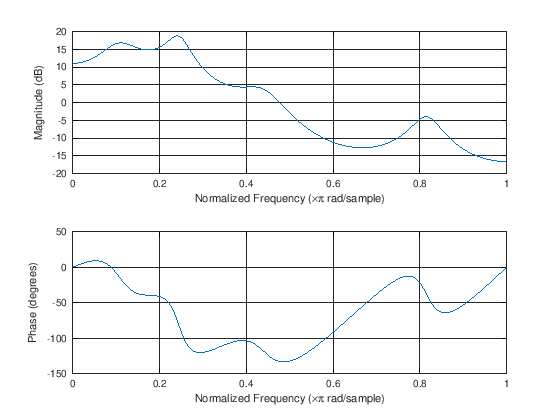

In [9]:
pkg load signal
[x, fs] = audioread ('/tmp/ae.wav');
% Pre-emphasis
pre = [1 -0.9];
x = filter(pre,1,x);
order = 8;
[a, g] = lpc(x, order);
freqz(1,a);
% formants
F = sort (unique (abs (angle (roots (a)))/pi))' 
F = round (sort (unique (abs (angle (roots (a))))) * fs / (2 * pi) )' % Hz
% residue
est_x = filter([0 -a(2:end)],1,x);
e = x-est_x;
% synthesize using residue
xs = filter(1,a,e);
soundsc(xs,fs);

Agora utilizaremos o GNU Octave para obter os formantes das vogais contidas nos arquivos .wav previamente baixados. Para tanto utilizaremos a função *lpc*, que retornará os coeficientes de filtro. Basta então encontrar os ângulos dos pólos para obter as frequências dos formantes das vogais. Cada vogal será apresentada no gráfico de F2xF1.

foldername = /tmp/
1	/tmp/BackwardSchwa.wav
2	/tmp/BackwardScriptA.wav
3	/tmp/BackwardsEpsilon.wav
4	/tmp/BarredI.wav
5	/tmp/BarredO.wav
6	/tmp/BarredU.wav
7	/tmp/CapitalOE.wav
8	/tmp/CapitalU.wav
9	/tmp/CapitalY.wav
10	/tmp/Caret.wav
11	/tmp/CentralA.wav
12	/tmp/ClosedSidewaysEpsilon.wav
13	/tmp/Epsilon.wav
15	/tmp/LowerCaseOE.wav
16	/tmp/OpenO.wav
17	/tmp/RamsHorns.wav
18	/tmp/ScriptA.wav
19	/tmp/SlashO.wav
20	/tmp/SmallCapI.wav
21	/tmp/UpsideDownA.wav
22	/tmp/UpsideDownM.wav
23	/tmp/ae.wav
24	/tmp/e.wav
25	/tmp/i.wav
26	/tmp/o.wav
27	/tmp/u.wav
28	/tmp/y.wav


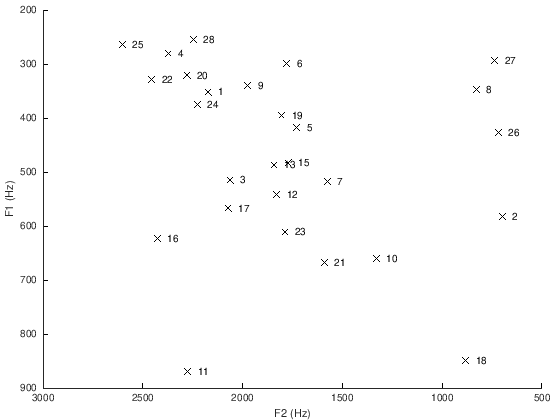

In [8]:
pkg load signal

foldername = '/tmp/'
listfiles = dir(cstrcat(foldername,'*.wav'));

F = []; figure; hold on;
for i=1:length(listfiles),
  if listfiles(i).bytes > 0,
    filename=cstrcat(listfiles(i).folder, '/', listfiles(i).name);
    printf('%d\t%s\n',i,filename);
    [x,fs]=audioread(filename);
    [a,g] = lpc(x,8);
    f = round (sort (unique (abs (angle (roots (a))))) * fs / (2 * pi) );
    if f(1)==0, f=f(2:end); endif;
    F(i,:) = f(1:3)';
    plot(f(2),f(1),'kx');
    text(f(2)-50,f(1),num2str(i));
  endif
endfor;
xlabel('F2 (Hz)'); ylabel('F1 (Hz)');
set (gca (), "xdir", "reverse")
set (gca (), "ydir", "reverse")